```{margin} Adaptation!
This lecture was adapted from the scikit-learn MOOC, which is available under the CC-by 4.0 license here: https://github.com/INRIA/scikit-learn-mooc

The penguin dataset is available under the CC-0 license and available from https://github.com/allisonhorst/palmerpenguins

Artwork by @allison_horst!
```

`````{note}
This lecture is going to:
* Introduce a new dataset with categorical variables (penguins!)
* Demonstrate the use of a linear model (logistic regression) for binary classification problems
* Show how we can visualize the binary classification problems
* Discuss the primary metric for binary classification problems (accuracy)
`````

`````{seealso}
* https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
* https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3
`````

# Linear models for classification
In regression, we saw that the target to be predicted was a continuous
variable. In classification, this target will be discrete (e.g. categorical).

Before we jump in to our first linear model, let's talk about a new dataset (that could be somewhat relevant to BME double majors who have taken physiology!).


##  The penguins datasets

To demonstrate linear classification models we'll use the 
[Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/)
dataset. We use this dataset for both classification and regression
problems by selecting a subset of the features to make our explanations
intuitive.

We will use this dataset in classification setting to predict the penguins'
species from anatomical information.

Each penguin is from one of the three following species: Adelie, Gentoo, and
Chinstrap. See the illustration below depicting the three different penguin
species:

![Image of penguins](https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/lter_penguins.png?raw=true)

This problem is a classification problem since the target is categorical.
We will limit our input data to a subset of the original features
to simplify our explanations when presenting the decision tree algorithm.
Indeed, we will use features based on penguins' culmen (bill) measurement. You can
learn more about the penguins' culmen (bill) with the illustration below:

![Image of culmen](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png)


We will start by loading this subset of the dataset.

In [15]:
import pandas as pd

penguins = pd.read_csv("datasets/penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Let's check the dataset more into details.

In [16]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


Since that we have few samples, we can check a scatter plot to observe the
samples distribution.

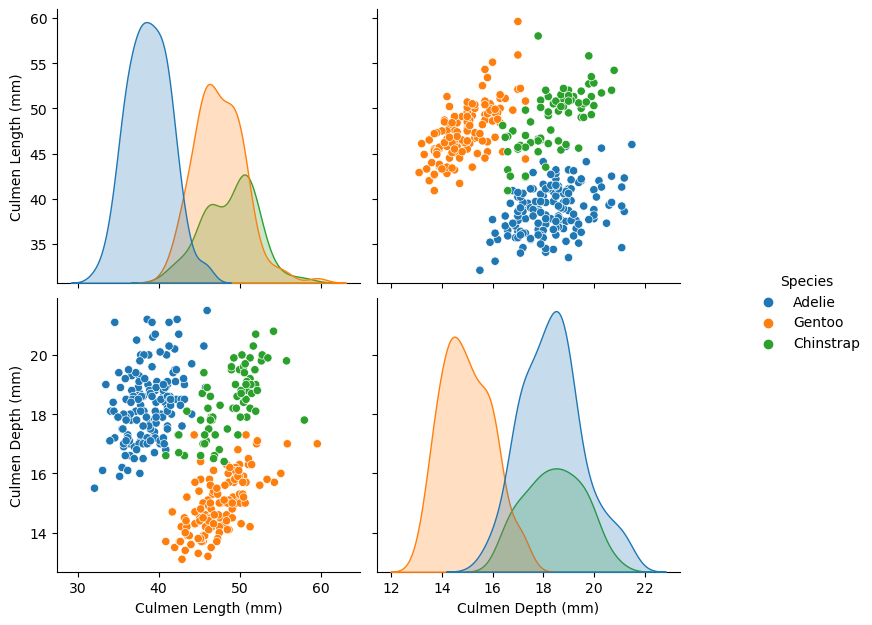

In [17]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)

First let's check the feature distributions by looking at the diagonal plots
of the pairplot. We can deduce the following intuitions:

* The Adelie species can be differentiated from the Gentoo and Chinstrap
  species depending on the culmen length;
* The Gentoo species can be differentiated from the Adelie and Chinstrap
  species depending on the culmen depth.


## Binary classification

We will try to predict the penguin species using the culmen information. We will also
simplify our classification problem by selecting only 2 of the penguin
species (Adelie and Chinstrap) to solve a binary classification problem.

In [25]:
import pandas as pd

penguins = pd.read_csv("datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

We can quickly start by visualizing the feature distribution by class:

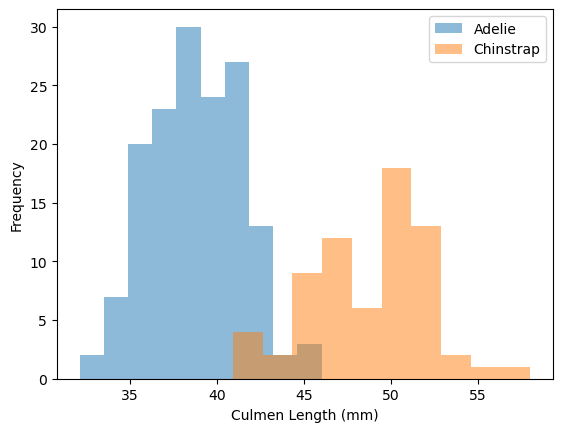

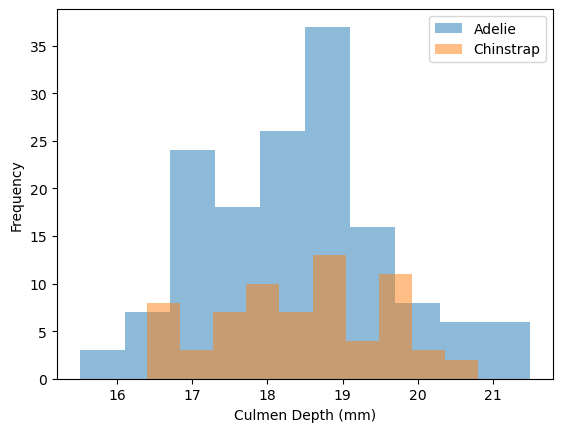

In [26]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We can observe that we have quite a simple problem. When the culmen
length increases, the probability that the penguin is a Chinstrap is closer
to 1. However, the culmen depth is less helpful for predicting the penguin
species.

## Train/test split

For model fitting, we will separate the target from the data and
we will create a training and a testing set. We could make a validation set as well if we wanted to be a bit more careful.

In [27]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

## Naive model (guess the most common label)

To get some intuition, let's try the simplest possible model we can think of using just the labels. We will make find the most common type of penguin in the dataset, and always guess that.

In [28]:
import numpy as np

most_common_penguin = target_train.mode()[0]


def naivemodel(X):
    return [most_common_penguin] * X.shape[0]


print(naivemodel(np.array([[1, 1]])))

['Adelie']


## Metrics for binary classification problems

**accuracy** is the primary metric for classification problems, and is the percentage of the data that is correctly classified by the model.

`````{seealso}
Statistics for binary classification problems is a complicated area, especially if the dataset is imbalanced (see the danger note at the end of the lecture) or if there is prior information known about the classification. There are more metrics that can be used in these cases, most of which are various combinations of the true positive, false positive, true negative, false negative statistics:
* https://en.wikipedia.org/wiki/Confusion_matrix
`````

We can do this by hand or using sklearn's built-in scoring function.

In [29]:
correct_classification = target_test == naivemodel(data_test)
accuracy = correct_classification.sum() / len(correct_classification)
print(f"Accuracy with custom code: {accuracy*100:.1f}%")

from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(target_test, naivemodel(data_test))

print(f"Accuracy with sklearn scoring code: {sklearn_accuracy*100:.1f}%")

Accuracy with custom code: 61.8%
Accuracy with sklearn scoring code: 61.8%


~62% of the penguins in the dataset set were Adelie, so our naive model (no ML required!) gets 62% correct. We should be able to do better than this if our ML model has any value.

## Logistic regression



The linear regression that we have seen so far  will predict a continuous
output. When the target is a binary outcome, one can use the logistic
function to model the probability. This model is known as logistic
regression.

Scikit-learn provides the class `LogisticRegression` which implements this
algorithm.

`````{seealso}
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://en.wikipedia.org/wiki/Logistic_regression
`````

In [30]:
import sklearn

sklearn.set_config(display="diagram")

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_regression = make_pipeline(
    StandardScaler(), PolynomialFeatures(4), LogisticRegression(penalty="none")
)
logistic_regression = make_pipeline(
     LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)

Pipeline(steps=[('logisticregression', LogisticRegression(penalty='none'))])

We can calculate our model performance using the scoring function attached to the model. This is basically the same as predicting on the test set and using the scoring function above.

In [39]:
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 1.000



Since we are dealing with a classification problem containing only 2
features, it is then possible to observe the decision function boundary.
The boundary is the rule used by our predictive model to affect a class label
given the feature values of the sample.

`````{note}
Here, we will use the class DecisionBoundaryDisplay. This educational tool
allows us to gain some insights by plotting the decision function boundary
learned by the classifier in a 2 dimensional feature space.</p>
<p class="last">Notice however that in more realistic machine learning contexts, one would typically fit on more than two features at once and therefore it would not be possible to display such a visualization of the decision boundary in general.
`````

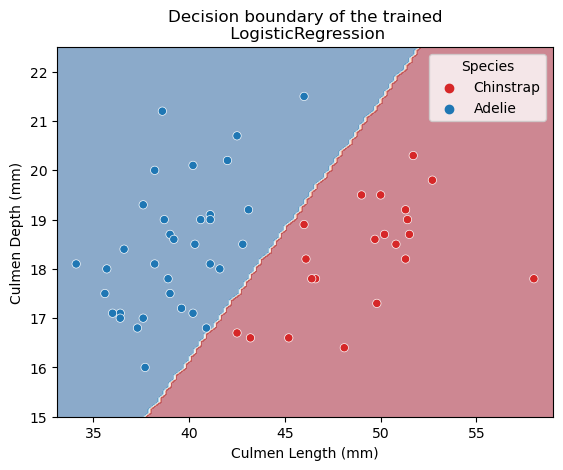

In [34]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

Thus, we see that our decision function is represented by a line separating
the 2 classes. We should also note that we did not impose any regularization
by setting the parameter `penalty` to `'none'`.

Since the line is oblique, it means that we used a combination of both
features:

In [40]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

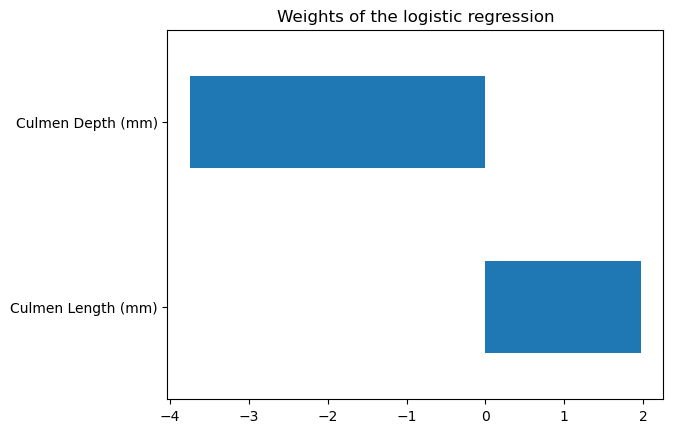

In [41]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

Indeed, both coefficients are non-null. If one of them had been zero, the
decision boundary would have been either horizontal or vertical.

Furthermore the intercept is also non-zero, which means that the decision does
not go through the point with (0, 0) coordinates.

For the mathematically inclined reader, the equation of the decision boundary
is:

    coef0 * x0 + coef1 * x1 + intercept = 0

where `x0` is `"Culmen Length (mm)"` and `x1` is `"Culmen Depth (mm)"`.

This equation is equivalent to (assuming that `coef1` is non-zero):

    x1 = coef0 / coef1 * x0 - intercept / coef1

which is the equation of a straight line.

`````{danger}

Skeptical chemical engineering students might notice that the metric we're using here (**accuracy**) here can lead to problems if the dataset is imbalanced.

Imagine a dataset of where there were 1000 penguins, 999 of which were Adelie and 1 of which was Chinstrap. In this case, a naive model that always predicted "Adelie", regardless of the penguin features, would be 99.9% correct! At first glance the model would sound very impressive, but it would actually be worthless for predicting Chinstrap penguins.

If you're dealing with strongly imbalanced, you should think carefully about the statistics:
* https://en.wikipedia.org/wiki/Confusion_matrix
* https://arxiv.org/ftp/arxiv/papers/2108/2108.00071.pdf
`````